In [57]:
#!/home/kddmer/.pyenv/versions/env3/bin/python
# -*- coding: utf-8 -*-

import sys
import os
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
import cv2
sys.path.append("C:\\Users\.data-zhiy\\Desktop\\company\\models\\watermark\\auto_wmr\\src")
import estimate_watermark_raw4 as ew
import preprocess2 as pp

In [50]:
# 预处理图像
# pp.preprocess('images\\raw', 'images\\proc')

# 识别水印位置
gx, gy, gxlist, gylist = ew.estimate_watermark('images\\proc')
# est = ew.poisson_reconstruct(gx, gy)
cropped_gx, cropped_gy = ew.crop_watermark(gx, gy)
W_m = ew.poisson_reconstruct(cropped_gx, cropped_gy)

Computing gradients.
Computing median gradients.


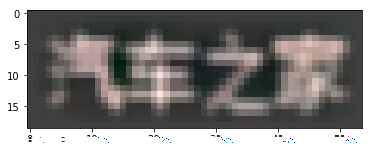

In [51]:
plt.imshow(ew.PlotImage(cropped_gy))
plt.show()
plt.imshow(ew.PlotImage(W_m))
plt.show()

In [52]:
W_mod = np.sqrt(np.square(gx) + np.square(gy))
W_mod = ew.PlotImage(W_mod)

In [58]:
img = cv2.imread('images\\proc\\1.jpg')
im, start, end = ew.watermark_detector(img, cropped_gx, cropped_gy)
print(start, end)
plt.figure(figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(im)
plt.show()

x,y,rect[0],rect[1]:  444 644 19 54
(444, 644) (19, 54)


In [95]:
import watermark_reconstruct_raw10 as wr
proc_folder = 'images\\proc'

num_images = len(gxlist)
Wm = W_m - W_m.min()
J, img_paths = wr.get_cropped_images(proc_folder, num_images, start, end, cropped_gx.shape)

In [96]:
import copy
alph_est = wr.estimate_normalized_alpha(J, Wm, num_images)
alph = np.stack([alph_est, alph_est, alph_est], axis=2)
C, est_Ik = wr.estimate_blend_factor(J, Wm, alph)

alpha = alph.copy()
for i in range(3):
	alpha[:,:,i] = C[i] * alpha[:, :, i]
Wm = Wm + alpha * est_Ik
W = copy.deepcopy(Wm)
for i in range(3): 
	W[:,:,i] /= C[i]
Jt = J
Wk, Ik, W, alpha1 = wr.solve_images(Jt, W_m, alpha, W)

Estimating normalized alpha using 21 images.
0.4990431482524269
0.426912870165602
0.4242415323975844
------------------------------------
Iteration: 0
Step 1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
Step 2
Step 3
------------------------------------
Iteration: 1
Step 1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
Step 2
Step 3
------------------------------------
Iteration: 2
Step 1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
Step 2
Step 3
------------------------------------
Iteration: 3
Step 1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
Step 2
Step 3
------------------------------------
Iteration: 4
Step 1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
Step 2
Step 3


In [97]:
k = 0
mg = 3 # 边缘经常有毛边，跳开这部分
for file in img_paths:
	img = cv2.imread(file)
	iw = 0
	for i in range(start[0]+mg, start[0]+end[0]-mg):	# start end形如: (229, 164) (39, 172)
		jw = 0
		for j in range(start[1]+mg, start[1]+end[1]-mg):
			img[i][j] = Ik[k][iw+mg][jw+mg]
			jw +=1
		iw +=1
	filewmr = file.split('.')[0] + '_wmr.' + file.split('.')[1]
	cv2.imwrite(filewmr, img)
	k +=1